In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("D:\TaiLieu\KhaiPhaDuLieu\BaiTapLon\TapDuLieu\diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.drop_duplicates(inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()
df["gender"] = le.fit_transform(df['gender'])
df["smoking_history"] = le.fit_transform(df['smoking_history'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

NameError: name 'X' is not defined

In [6]:
X = df.iloc[:, 5:8]
Y = df.iloc[:, 8]
X

,bmi,HbA1c_level,blood_glucose_level
0,25.19,6.6,140
1,27.32,6.6,80
2,27.32,5.7,158
3,23.45,5.0,155
4,20.14,4.8,155
...,...,...,...
99994,24.60,4.8,145
99996,17.37,6.5,100
99997,27.83,5.7,155
99998,35.42,4.0,100


In [7]:
from sklearn.cluster import KMeans

In [8]:
# kmeans = KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state=   0, algorithm='elkan')
kmeans = KMeans(n_clusters = 2, random_state=0)

In [9]:
kmeans.fit(X)

C:\Users\Do Duc Quang Phuong\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [10]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# In ra số lượng mỗi phần tử thuộc về từng cụm
for cluster, count in cluster_counts.items():
    print(f"Số lượng phần tử thuộc về cụm {cluster}: {count}")

Số lượng phần tử thuộc về cụm 0: 41906
Số lượng phần tử thuộc về cụm 1: 54240


In [11]:
kmeans.cluster_centers_

array([[ 27.02078843,   5.44654703, 102.71216532],
       [ 27.5537618 ,   5.59910029, 165.65033186]])

In [12]:
kmeans.labels_[:200]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1])

In [13]:
print(np.array(Y)[:200])

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


C:\Users\Do Duc Quang Phuong\AppData\Local\Temp\ipykernel_50672\934964049.py:30: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('kmeans_clusters.png')
C:\Users\Do Duc Quang Phuong\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


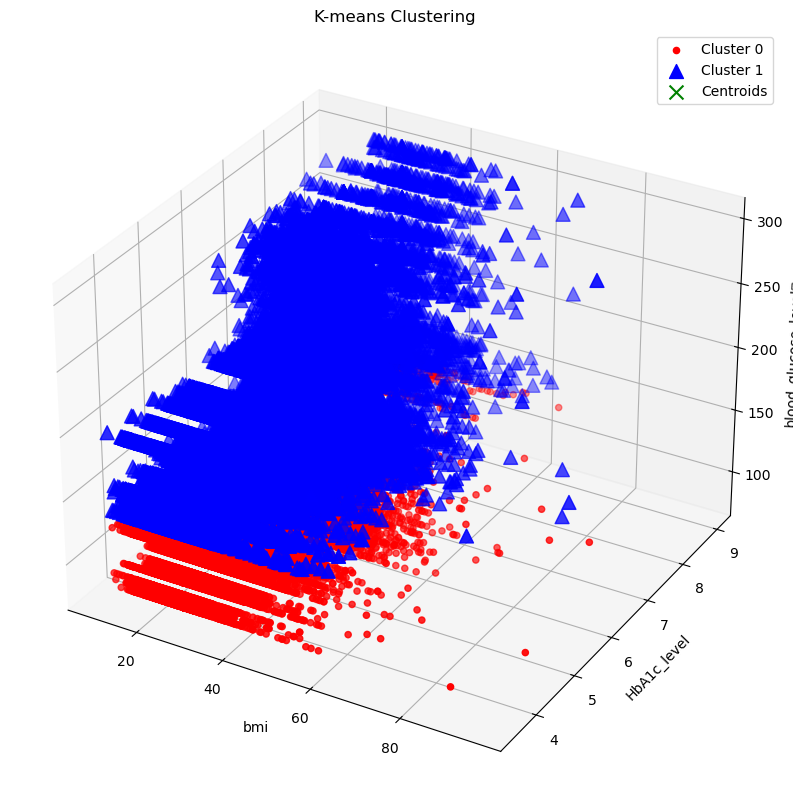

In [14]:
# Lấy các trọng tâm của các cụm
centroids = kmeans.cluster_centers_

# Lấy nhãn của các cụm cho mỗi mẫu dữ liệu
labels = kmeans.labels_

# Chuyển đổi labels và X thành mảng NumPy
labels_np = np.array(labels)
X_np = np.array(X)

# Vẽ dữ liệu
fig = plt.figure(figsize=(10, 10))  # Phóng to biểu đồ
ax = fig.add_subplot(111, projection='3d')

# Vẽ các mẫu dữ liệu thuộc cụm 0
ax.scatter(X_np[labels_np == 0, 0], X_np[labels_np == 0, 1], X_np[labels_np == 0, 2], c='r', marker='o', label='Cluster 0')

# Vẽ các mẫu dữ liệu thuộc cụm 1 dưới dạng tam giác và phóng to
ax.scatter(X_np[labels_np == 1, 0], X_np[labels_np == 1, 1], X_np[labels_np == 1, 2], c='b', marker='^', s=100, label='Cluster 1')

# Vẽ các trọng tâm của các cụm
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='g', marker='x', s=100, label='Centroids')

ax.set_xlabel('bmi')
ax.set_ylabel('HbA1c_level')
ax.set_zlabel('blood_glucose_level	')

plt.title('K-means Clustering')
plt.legend()
plt.savefig('kmeans_clusters.png')
plt.show()

In [15]:
print("Total square error:", kmeans.inertia_)

Total square error: 71769503.87618804


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [22]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64

In [23]:
kmeans.predict(X)

array([0, 1, 0, ..., 0, 1, 1])

In [37]:
metrics.confusion_matrix(Y,kmeans.predict(X))

array([[40580, 47084],
       [ 1326,  7156]], dtype=int64)

In [38]:
labels = kmeans.labels_

# Tính ma trận nhầm lẫn
cm = confusion_matrix(Y, labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[40580 47084]
 [ 1326  7156]]


In [16]:
X_1 = df.iloc[:, 0:8]
Y_1 = df.iloc[:, 8]

In [17]:
kmeans.fit(X_1)

C:\Users\Do Duc Quang Phuong\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [20]:
print("Total square error:", kmeans.inertia_)

Total square error: 120544666.60129748


In [18]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# In ra số lượng mỗi phần tử thuộc về từng cụm
for cluster, count in cluster_counts.items():
    print(f"Số lượng phần tử thuộc về cụm {cluster}: {count}")

Số lượng phần tử thuộc về cụm 0: 41906
Số lượng phần tử thuộc về cụm 1: 54240


In [19]:
kmeans.cluster_centers_

array([[4.10704911e-01, 4.05677516e+01, 6.66730301e-02, 3.45296616e-02,
        2.18808762e+00, 2.70207884e+01, 5.44654703e+00, 1.02712165e+02],
       [4.20206490e-01, 4.27419808e+01, 8.60435103e-02, 4.56489676e-02,
        2.26443584e+00, 2.75537618e+01, 5.59910029e+00, 1.65650332e+02]])

In [42]:
kmeans.labels_[:200]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1])

In [43]:
print(np.array(Y)[:200])

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [44]:
labels = kmeans.labels_

# Tính ma trận nhầm lẫn
cm = confusion_matrix(Y, labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[40580 47084]
 [ 1326  7156]]


In [21]:
from sklearn_extra.cluster import KMedoids

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [46]:
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids.fit(X)

MemoryError: Unable to allocate 68.9 GiB for an array with shape (96146, 96146) and data type float64

In [22]:
df1 = df.sample(frac=0.0104, random_state=0)
df1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
77645,1,62.0,0,0,3,28.01,3.5,200,0
68911,1,59.0,0,0,5,34.92,6.8,280,1
4123,0,73.0,0,0,5,22.10,4.0,100,0
50172,1,63.0,0,0,4,26.19,7.0,140,1
71861,1,34.0,0,0,3,34.05,5.7,80,0
...,...,...,...,...,...,...,...,...,...
44126,0,53.0,0,0,0,27.32,3.5,200,0
8287,0,63.0,0,0,4,31.16,6.1,158,0
80487,0,14.0,0,0,4,21.48,6.5,130,0
86788,0,29.0,0,0,4,30.60,5.7,159,0


In [23]:
df1["gender"] = le.fit_transform(df1['gender'])
df1["smoking_history"] = le.fit_transform(df1['smoking_history'])
df1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
77645,1,62.0,0,0,3,28.01,3.5,200,0
68911,1,59.0,0,0,5,34.92,6.8,280,1
4123,0,73.0,0,0,5,22.10,4.0,100,0
50172,1,63.0,0,0,4,26.19,7.0,140,1
71861,1,34.0,0,0,3,34.05,5.7,80,0
...,...,...,...,...,...,...,...,...,...
44126,0,53.0,0,0,0,27.32,3.5,200,0
8287,0,63.0,0,0,4,31.16,6.1,158,0
80487,0,14.0,0,0,4,21.48,6.5,130,0
86788,0,29.0,0,0,4,30.60,5.7,159,0


In [24]:
X_2 = df1.iloc[:, 0:8]
Y_2 = df1.iloc[:, 8]

In [79]:
X_2 = scaler.fit_transform(X_2)

In [25]:
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids.fit(X_2)

KMedoids(n_clusters=2, random_state=0)

In [27]:
print("Total square error:", kmedoids.inertia_)

Total square error: 30381.780068442953


In [61]:
kmedoids.cluster_centers_

array([[  0.  ,  43.  ,   0.  ,   0.  ,   3.  ,  24.51,   6.2 ,  90.  ],
       [  1.  ,  43.  ,   0.  ,   0.  ,   1.  ,  27.93,   4.5 , 155.  ]])

In [63]:
kmedoids.labels_[:300]

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1], d

In [64]:
print(np.array(Y_2)[:300])

[0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [65]:
labels1 = kmedoids.labels_

# Tính ma trận nhầm lẫn
cm = confusion_matrix(Y_2, labels1)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[265 634]
 [  0 101]]


In [72]:
X3 = df1.iloc[:, [1, 6, 7]]
X3

,age,HbA1c_level,blood_glucose_level
77645,62.0,3.5,200
68911,59.0,6.8,280
4123,73.0,4.0,100
50172,63.0,7.0,140
71861,34.0,5.7,80
...,...,...,...
44126,53.0,3.5,200
8287,63.0,6.1,158
80487,14.0,6.5,130
86788,29.0,5.7,159


In [118]:
X3 = scaler.fit_transform(X3)

In [73]:
kmedoids.fit(X3)

KMedoids(n_clusters=2, random_state=0)

In [74]:
unique, counts = np.unique(kmedoids.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# In ra số lượng mỗi phần tử thuộc về từng cụm
for cluster, count in cluster_counts.items():
    print(f"Số lượng phần tử thuộc về cụm {cluster}: {count}")

Số lượng phần tử thuộc về cụm 0: 272
Số lượng phần tử thuộc về cụm 1: 728


In [75]:
kmedoids.cluster_centers_

array([[ 37.,   6.,  90.],
       [ 44.,   6., 155.]])

In [76]:
kmedoids.labels_[:300]

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1], d

In [77]:
print(np.array(Y_2)[:300])

[0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [78]:
labels3 = kmedoids.labels_

# Tính ma trận nhầm lẫn
cm = confusion_matrix(Y_2, labels3)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[272 627]
 [  0 101]]


C:\Users\Do Duc Quang Phuong\AppData\Local\Temp\ipykernel_2632\361015168.py:30: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('kmedoids_clusters.png')


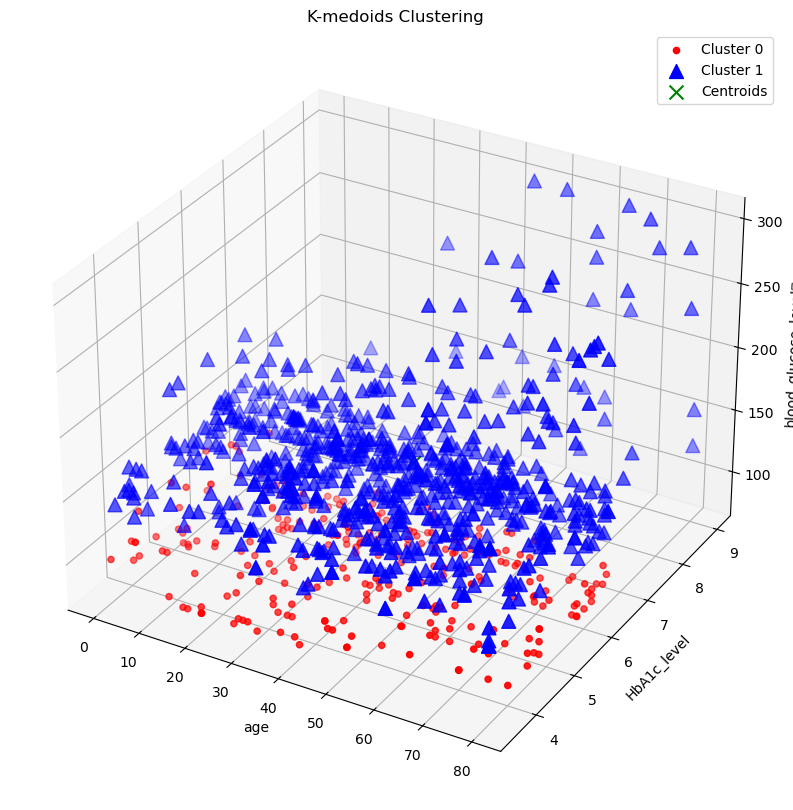

In [80]:
# Lấy các trọng tâm của các cụm
centroids = kmedoids.cluster_centers_

# Lấy nhãn của các cụm cho mỗi mẫu dữ liệu
labels = kmedoids.labels_

# Chuyển đổi labels và X thành mảng NumPy
labels_np = np.array(labels)
X_np = np.array(X3)

# Vẽ dữ liệu
fig = plt.figure(figsize=(10, 10))  # Phóng to biểu đồ
ax = fig.add_subplot(111, projection='3d')

# Vẽ các mẫu dữ liệu thuộc cụm 0
ax.scatter(X_np[labels_np == 0, 0], X_np[labels_np == 0, 1], X_np[labels_np == 0, 2], c='r', marker='o', label='Cluster 0')

# Vẽ các mẫu dữ liệu thuộc cụm 1 dưới dạng tam giác và phóng to
ax.scatter(X_np[labels_np == 1, 0], X_np[labels_np == 1, 1], X_np[labels_np == 1, 2], c='b', marker='^', s=100, label='Cluster 1')

# Vẽ các trọng tâm của các cụm
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='g', marker='x', s=100, label='Centroids')

ax.set_xlabel('age')
ax.set_ylabel('HbA1c_level')
ax.set_zlabel('blood_glucose_level	')

plt.title('K-medoids Clustering')
plt.legend()
plt.savefig('kmedoids_clusters.png')
plt.show()